<a href="https://colab.research.google.com/github/mvdj/mvdj.github.io/blob/master/QualidadeVinho_%C3%81rvoreDeDecis%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Qualidade Vinho - Classificação com Árvores de Decisão**

Dataset (https://archive.ics.uci.edu/ml/datasets/wine+quality) com 8096 instâncias de dados sobre a qualidade dos vinhos (Red and White), com os seguintes atributos:

1. wine type
2. fixed acidity
3. volatile acidity
4. citric acid
5. residual sugar
6. chlorides
7. free sulfur dioxide
8. total sulfur dioxide
9. density
10. pH
11. sulphates
12. alcohol
Output variable (based on sensory data): 
13. quality (score between 0 and 10)

Dados descrevem componentes químicos/biológicos que fazem parte da qualidade de um vinho.

* Aprendizado supervisionado
* Mapeamento de um vetor de atributos para um atributo de classe
* Seja $x_i$ um conjunto de $n$ instâncias pertencentes a uma classe $c$ 
  * $x_i$ tem dimensão $d$
  * existem $m$ classes, $c \in {c_1,...,c_m}$
* Aprendizagem é identificar a função $f$ tal que:
  * $f([x_{i1},x_{i2},...,x_{id}]) = c$




In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive/


# **1. Importação das bibliotecas**


In [2]:
# Importando bibliotecas
import pandas as pd
import matplotlib.pyplot as plt

# **2. Lendo dados**


In [3]:
# lendo csv e armazenando em um dataframe
dados = pd.read_csv('/content/drive/My Drive/Colab Notebooks/dataSets/QualidadeVinho/winequality-whiteAndRed.csv')

In [4]:
# verificando o dataframe
dados.head(5)

,wine type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,45.00,45.0,170.0,1001.0000,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,49.00,14.0,132.0,994.0000,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.05,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,58.00,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,58.00,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [5]:
#verificando colunas dos dados
dados.columns

Index(['wine type', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality'],
      dtype='object')

In [6]:
#verificar a quantidade de instâncias
dados.count

<bound method DataFrame.count of      wine type  fixed acidity  volatile acidity  ...  sulphates  alcohol  quality
0        white            7.0              0.27  ...       0.45      8.8        6
1        white            6.3              0.30  ...       0.49      9.5        6
2        white            8.1              0.28  ...       0.44     10.1        6
3        white            7.2              0.23  ...       0.40      9.9        6
4        white            7.2              0.23  ...       0.40      9.9        6
...        ...            ...               ...  ...        ...      ...      ...
8091       red            6.2              0.60  ...       0.58     10.5        5
8092       red            5.9              0.55  ...       0.76     11.2        6
8093       red            6.3              0.51  ...       0.75     11.0        6
8094       red            5.9            645.00  ...       0.71     10.2        5
8095       red            6.0              0.31  ...       0.66  

# **3. Limpeza e organização dos dados**

In [7]:
#verificar e eliminar se existem valores NAN, ? e/ou faltantes
dados = dados.dropna()

In [8]:
#eliminar colunas irrelevantes para o contexto
dados = dados.drop(columns=['density']) # atributo com valores desproporcional

In [9]:
#verificar quantidade de instâncias sem valores NAN, ? e/ou faltantes
dados.head()

,wine type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,45.00,45.0,170.0,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,49.00,14.0,132.0,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.05,30.0,97.0,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,58.00,47.0,186.0,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,58.00,47.0,186.0,3.19,0.40,9.9,6


In [10]:
#trocando o tipo do atributo 'wine type'  por um tipo numerico
dados['wine type'] = dados['wine type'].replace(['white','red'],[0,1]) # 0 - para white wine | 1 - para red wine
dados.head()

,wine type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,pH,sulphates,alcohol,quality
0,0,7.0,0.27,0.36,20.7,45.00,45.0,170.0,3.00,0.45,8.8,6
1,0,6.3,0.30,0.34,1.6,49.00,14.0,132.0,3.30,0.49,9.5,6
2,0,8.1,0.28,0.40,6.9,0.05,30.0,97.0,3.26,0.44,10.1,6
3,0,7.2,0.23,0.32,8.5,58.00,47.0,186.0,3.19,0.40,9.9,6
4,0,7.2,0.23,0.32,8.5,58.00,47.0,186.0,3.19,0.40,9.9,6


# **4. Re-escala dos dados**

**Re-escala usando máximo e mínimo**

In [11]:
dados = (dados - dados.min())/(dados.max()-dados.min())

# **5. Organizando dados para modelagem**

**Dividir os dados em atributos descritores e atributo de classe (target)**

In [12]:
#dividindo dados em atributos descritores e atributo de classe
X = dados.iloc[:,1:]
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,pH,sulphates,alcohol,quality
0,0.264463,0.000160,0.216867,0.308282,0.073619,0.152778,0.377880,0.217054,0.129213,0.115942,0.5
1,0.206612,0.000186,0.204819,0.015337,0.080166,0.045139,0.290323,0.449612,0.151685,0.217391,0.5
2,0.355372,0.000169,0.240964,0.096626,0.000049,0.100694,0.209677,0.418605,0.123596,0.304348,0.5
3,0.280992,0.000127,0.192771,0.121166,0.094897,0.159722,0.414747,0.364341,0.101124,0.275362,0.5
4,0.280992,0.000127,0.192771,0.121166,0.094897,0.159722,0.414747,0.364341,0.101124,0.275362,0.5


In [18]:
y = dados['wine type']
y.head()


0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: wine type, dtype: float64

**Dividir os dados em treino e teste**



In [19]:
from sklearn.model_selection import train_test_split

Divide a matriz em subconjuntos aleatórios de treino e teste
test_size: tamanho do subconjunto de teste (em percentual)
random_state: define a semente para a aleatoriedade (se não definido, semente aleatória)

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)#random_state=42

In [21]:
X_train.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,pH,sulphates,alcohol,quality
299,0.239669,0.000076,0.301205,0.023006,0.070346,0.090278,0.267281,0.333333,0.129213,0.333333,0.500000
3155,0.247934,0.000262,0.204819,0.104294,0.000000,0.128472,0.292627,0.356589,0.123596,0.579710,0.666667
5135,0.280992,0.544273,0.000000,0.019939,0.158729,0.048611,0.076037,0.503876,0.202247,0.173913,0.500000
6895,0.636364,0.000430,0.355422,0.030675,0.142361,0.041667,0.099078,0.356589,0.241573,0.434783,0.500000
740,0.256198,0.000262,0.240964,0.061350,0.035975,0.013889,0.029954,0.457364,0.084270,0.666667,0.000000


In [22]:
y_train.head()

299     0.0
3155    0.0
5135    0.0
6895    1.0
740     0.0
Name: wine type, dtype: float64

# **5. Definindo algoritmo de aprendizado**

Árvore de decisão
criterion: medida de qualidade das separações ('gini','entropia')
gini: impureza de Gini
entropy: ganho de informação
max_depth: profundidade máxima da árvore

In [23]:
from sklearn.tree import DecisionTreeClassifier

In [24]:
#definindo modelo
classificador = DecisionTreeClassifier()

In [25]:
#treinando modelo
classificador.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [26]:
from sklearn.tree import plot_tree

In [27]:
# mudando o tamanho da figura
plt.rcParams["figure.figsize"] = (30,20)

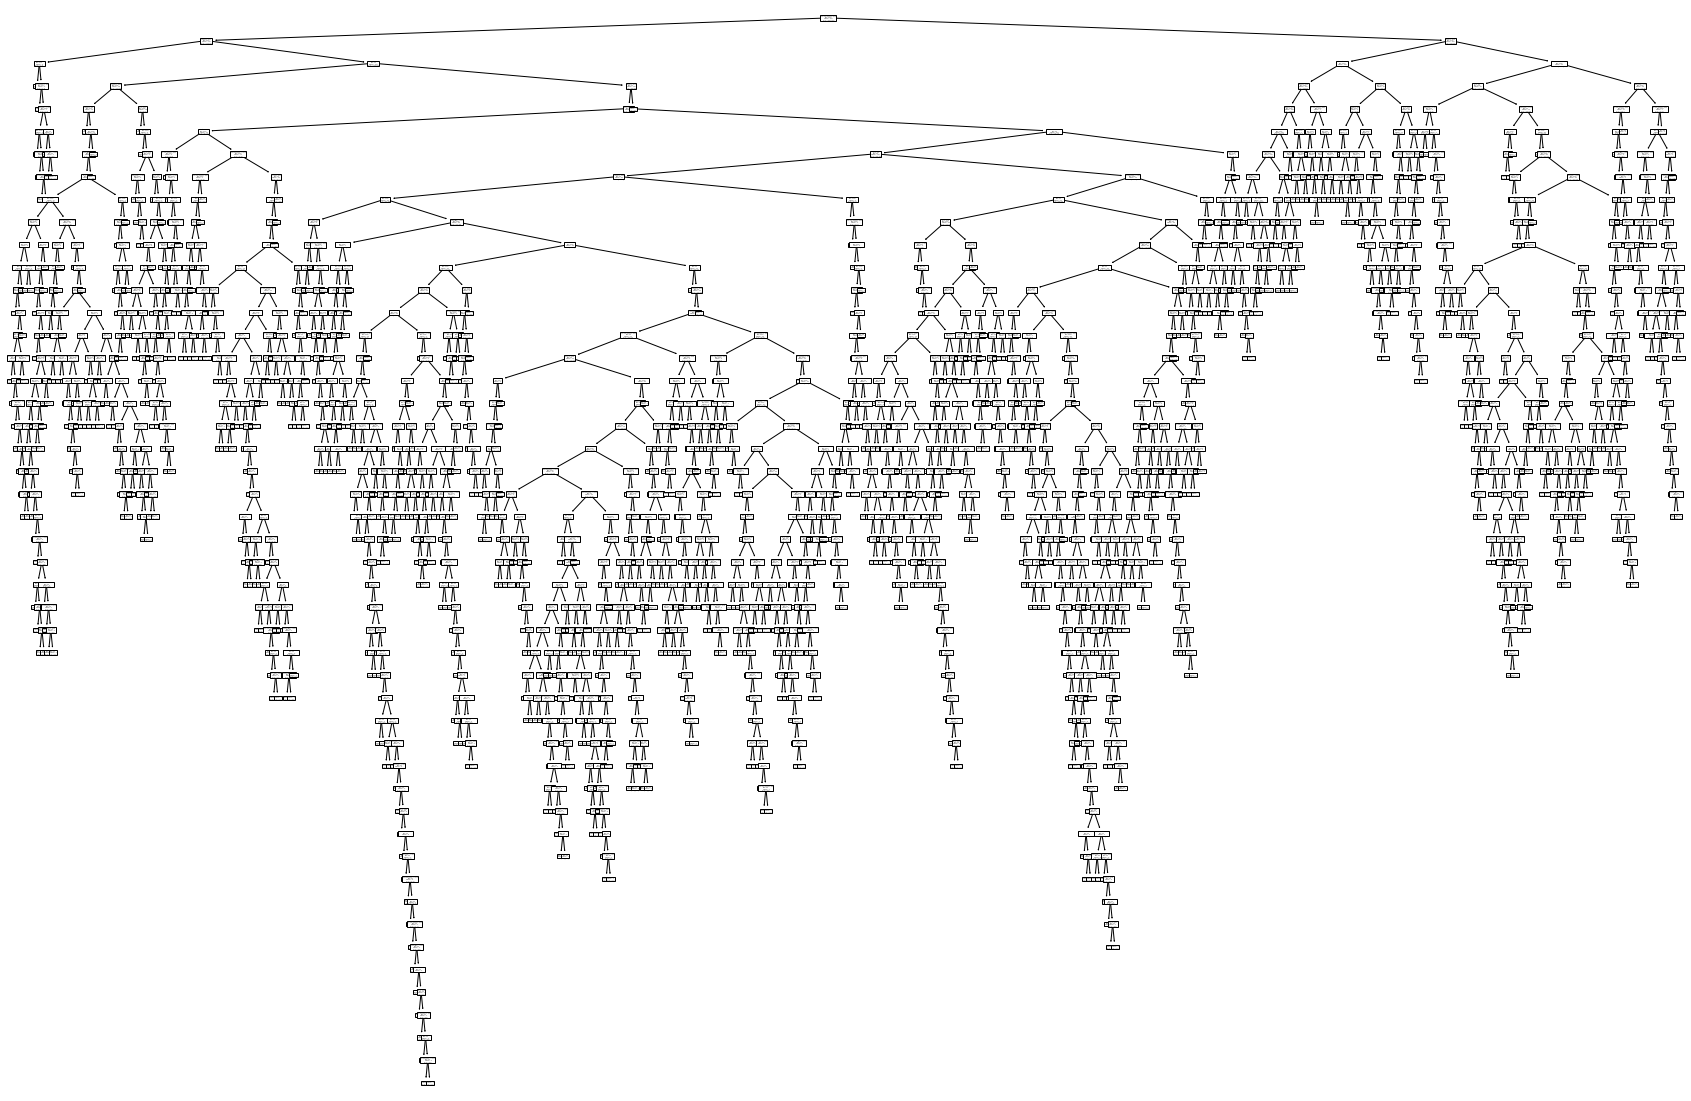

In [28]:
plot_tree(classificador,feature_names=dados.columns[1:])
plt.show()

In [29]:
# mudando o tamanho da figura
plt.rcParams["figure.figsize"] = (8,6)

In [30]:
#realizando classificação
classificacao = classificador.predict(X_test)
classificacao

array([0., 1., 0., ..., 0., 0., 0.])

In [31]:
for i in range(len(y_test)):
  print(y_test.iloc[i],'\t',classificacao[i])

0.0 	 0.0
0.0 	 1.0
0.0 	 0.0
1.0 	 0.0
0.0 	 0.0
0.0 	 0.0
1.0 	 0.0
0.0 	 0.0
0.0 	 1.0
0.0 	 1.0
0.0 	 0.0
0.0 	 0.0
1.0 	 0.0
0.0 	 0.0
0.0 	 1.0
1.0 	 0.0
0.0 	 0.0
0.0 	 1.0
0.0 	 1.0
0.0 	 0.0
0.0 	 0.0
1.0 	 0.0
0.0 	 0.0
0.0 	 0.0
0.0 	 0.0
0.0 	 0.0
0.0 	 0.0
0.0 	 1.0
1.0 	 0.0
0.0 	 1.0
1.0 	 0.0
0.0 	 0.0
0.0 	 0.0
1.0 	 0.0
0.0 	 0.0
0.0 	 0.0
1.0 	 0.0
0.0 	 0.0
0.0 	 0.0
0.0 	 1.0
0.0 	 0.0
0.0 	 1.0
0.0 	 1.0
0.0 	 1.0
0.0 	 0.0
1.0 	 0.0
0.0 	 0.0
0.0 	 1.0
0.0 	 0.0
0.0 	 1.0
0.0 	 1.0
0.0 	 0.0
0.0 	 0.0
0.0 	 0.0
0.0 	 0.0
0.0 	 0.0
0.0 	 1.0
1.0 	 0.0
0.0 	 0.0
1.0 	 0.0
0.0 	 0.0
0.0 	 0.0
0.0 	 0.0
0.0 	 0.0
1.0 	 0.0
0.0 	 0.0
0.0 	 0.0
0.0 	 1.0
0.0 	 1.0
1.0 	 0.0
0.0 	 0.0
0.0 	 0.0
0.0 	 0.0
0.0 	 0.0
1.0 	 0.0
0.0 	 0.0
0.0 	 1.0
0.0 	 0.0
1.0 	 0.0
0.0 	 0.0
0.0 	 0.0
0.0 	 0.0
0.0 	 0.0
0.0 	 0.0
0.0 	 0.0
0.0 	 0.0
1.0 	 0.0
0.0 	 0.0
0.0 	 0.0
0.0 	 1.0
0.0 	 0.0
0.0 	 0.0
0.0 	 0.0
0.0 	 0.0
0.0 	 0.0
1.0 	 0.0
0.0 	 0.0
1.0 	 0.0
0.0 	 0.0
0.0 	 0.0


# **6. Avaliação do classificador**

* Precisamos de métricas para saber quão bem nosso modelo se comportou
* No dataset temos instâncias que são positivas (vinho tinto) e negativas (vinho branco)
* Ideal é que o classificador classifique como positivo o que é positivo e negativo o que é negativo
* No entanto erros ocorrem na classificação
* Possibilidades de classificação:
  * tp (positivo verdadeiro): *vinho tinto* classificado como *tinto* - acerto
  * tn (negativo verdadeiro): *vinho branco* classificado como *branco* - acerto
  * fp (positivo falso): *vinho branco* classificado como *tinto* - erro
  * fn (negativo falso): *vinho tinto* foi classificado como *branco* - erro
* Exemplo:
  * 1 para tinto, 0 para branco

<table>
  <tr><th>Real</th><th>Predito</th><th>Categoria</th></tr>
  <tr><td>1</td><td>1</td><td>tp</td></tr>
  <tr><td>0</td><td>0</td><td>tn</td></tr>
  <tr><td>1</td><td>0</td><td>fn</td></tr>
  <tr><td>0</td><td>1</td><td>fp</td></tr>
  <tr><td>0</td><td>0</td><td>tn</td></tr>
  <tr><td>0</td><td>0</td><td>tn</td></tr>
  <tr><td>1</td><td>1</td><td>tp</td></tr>
  <tr><td>0</td><td>1</td><td>fp</td></tr>
  <tr><td>1</td><td>1</td><td>tp</td></tr>
  <tr><td>0</td><td>0</td><td>tn</td></tr>
</table>

* Resultado
  * acertos: $3 + 4 = 7$
  * erros: $1 + 2 = 3$
* Matriz de confusão

<table border="1">
    <tr>
        <th>Valores reais</th>
        <th colspan="2">Valores preditos</th>
    </tr>
    <tr>
        <td>Tinto</td>
        <td></td>
        <td>Branco</td>
    </tr>
    <tr>
        <td>Tinto</td>
        <td>3 (tp)</td>
        <td>1 (fn)</td>
    </tr>
    <tr>
        <td>Branco</td>
        <td>2 (fp)</td>
        <td>4 (tn)</td>
    </tr>
</table>

* Acurácia
  * taxa de acertos do classificador
  * indicação geral da performance do modelo
  * $acuracia = \dfrac{tp+tn}{tp+fp+tn+fn} = \dfrac{acertos}{total} = \dfrac{7}{10} = 0.7$
  * não é boa métrica quando dados muito desbalanceados
    * ex: fraudes no cartão de crédito

* Precisão
  * taxa de instâncias classificadas como positivas que são realmente positivas
  * $precision = \dfrac{tp}{tp+fp} = \dfrac{3}{5} = 0.6$
  * situações onde falsos positivos são mais prejudiciais
    * ex: classificar um investimento como boa oportunidade

* Recall
  * taxa de instâncias positivas classificadas corretamente
  * também chamaod de sentitividade ($sensitivity$)
  * $recall = \dfrac{tp}{tp+fn} = {3}{3+1} = 0.75$
  * situações onde falsos negativos são mais prejudiciais
    * ex: classificação de doenças

* F1-score
  * balanço entre precisão e recall (media harmônica)
  * forma de olhar apenas uma métrica ao invés de duas
  * $f$-$score = 2 * \dfrac{precision*recall}{precision+recall} = \dfrac{0.6 * 0.75}{0.6+0.75} = 0.67$
  * f1-score baixo indica que uma das duas métricas está baixa


In [40]:
#calculando acurácia
from sklearn.metrics import accuracy_score

In [41]:
acuracia = accuracy_score(y_test,classificacao)
acuracia

0.6246913580246913

In [42]:
#calculando precisão
from sklearn.metrics import precision_score

In [43]:
precisao = precision_score(y_test,classificacao)
precisao

0.061488673139158574

In [44]:
#calculando recall (revocação)
from sklearn.metrics import recall_score

In [45]:
recall = recall_score(y_test,classificacao)
recall

0.05637982195845697

In [46]:
#calculando f1-score
from sklearn.metrics import f1_score

In [47]:
f1 = f1_score(y_test,classificacao)
f1

0.0588235294117647

### Curva ROC
* Representação gráfica do desempenho de um classificador binário
* Razão entre a taxa de positivos verdadeiros (TPR) e positivos falsos (FPR)
  * $tpr = \dfrac{tp}{tp+fn} = \dfrac{positivos\_verdadeiros}{positivos\_totais}$ 
    * (recall)
  * $fpr = \dfrac{fp}{tn+fp} = \dfrac{positivos\_falsos}{negativos\_totais}$
* Interpretação
  * quanto maior tpr, melhor
  * quanto menor fpr, melhor

<img src=https://upload.wikimedia.org/wikipedia/commons/3/36/ROC_space-2.png width=500>

In [48]:
#plotando curva roc
from sklearn.metrics  import roc_curve

In [49]:
fpr, tpr, _ = roc_curve(y_test,classificacao)

In [50]:
fpr

array([0.        , 0.22603274, 1.        ])

In [51]:
tpr

array([0.        , 0.05637982, 1.        ])

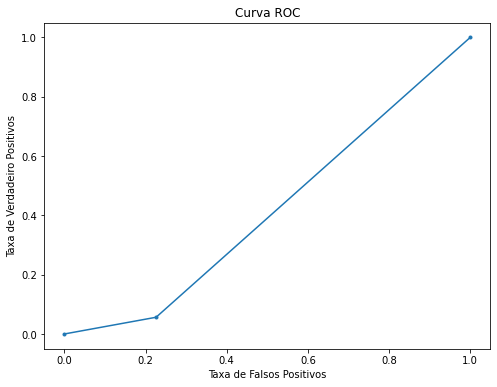

In [52]:
plt.plot(fpr,tpr,marker='.')
plt.title('Curva ROC')
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiro Positivos')
plt.show()

**Área sob a curva (Area under the curve - AUC)**
* Área sob a curva ROC
* Interpretação numérica da curva ROC

In [53]:
#calculando area sob a curva ROC
from sklearn.metrics import roc_auc_score

In [54]:
erro = roc_auc_score(y_test,classificacao)
erro

0.4151735430914655

## **Validação cruzada**
* A forma de avaliação anterior dividiu o dataset em dois subconjuntos disjuntos: treino e teste 
  * o treino foi usado para construir o modelo
  * o teste foi usado para avaliar o modelo
  * método holdout
* No entanto, devido a aleatoriedade, o resultado pode não ser tão confiável
* Validação cruzada k-fold
  * dividir o conjunto de dados em $k$ subconjuntos (folds) disjuntos
  * um subconjunto é usado para teste
  * os outros k-1 subconjuntos são usados para criar o modelo
  * repete-se o procedimento k vezes, alternando o subconjunto de teste
  * calcula-se a acurácia média das k repetições e tem-se a avaliação do método


<img src=https://scikit-learn.org/stable/_images/grid_search_cross_validation.png width="500">

In [55]:
# montando os folds para validação cruzada
from sklearn.model_selection import KFold

In [56]:
kf = KFold(n_splits=5)

In [57]:
#imprimindo os indices das instancias do treino e teste
for train,test in kf.split(X):
  print('Treino:',train,'\nTeste:',test)
  print('-----')

Treino: [1620 1621 1622 ... 8093 8094 8095] 
Teste: [   0    1    2 ... 1617 1618 1619]
-----
Treino: [   0    1    2 ... 8093 8094 8095] 
Teste: [1620 1621 1622 ... 3236 3237 3238]
-----
Treino: [   0    1    2 ... 8093 8094 8095] 
Teste: [3239 3240 3241 ... 4855 4856 4857]
-----
Treino: [   0    1    2 ... 8093 8094 8095] 
Teste: [4858 4859 4860 ... 6474 6475 6476]
-----
Treino: [   0    1    2 ... 6474 6475 6476] 
Teste: [6477 6478 6479 ... 8093 8094 8095]
-----


In [58]:
# avaliando modelo com cross validation
from sklearn.model_selection import cross_val_score

In [59]:
#define modelo
classificador = DecisionTreeClassifier()

In [60]:
#calculando os scores
scores = cross_val_score(classificador,X,y,cv=10)
scores

array([0.80246914, 0.80246914, 0.80246914, 0.80246914, 0.80246914,
       0.80246914, 0.80346106, 0.4289246 , 0.        , 0.19901112])

In [61]:
scores.mean(),scores.std()

(0.6246211600970563, 0.2883324063852302)

# **7. Comparando Árvore de Decisão com Random Forest**

**Método Holdout**

In [62]:
#definindo árvore de decisão
arvore = DecisionTreeClassifier()
arvore.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [63]:
#definindo random forest
from sklearn.ensemble import RandomForestClassifier
floresta = RandomForestClassifier(n_estimators=100)
floresta.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [64]:
#calculando acurácia da árvore de decisão
arvore.score(X_test,y_test)

0.6253086419753087

In [65]:
#calculando acurácia da random forest
floresta.score(X_train,y_train)

0.8465101914762199

In [66]:
#realizando previsão com árvore de decisão
clf_arvore = arvore.predict(X_test)

In [67]:
#realizando previsão com random forest
clf_floresta = floresta.predict(X_test)

In [68]:
#calculando curva roc da árvore de decisão
fpr_ar, tpr_ar, _ = roc_curve(y_test,clf_arvore)

In [69]:
#calculando curva roc da random forest
fpr_fl, tpr_fl, _ = roc_curve(y_test,clf_floresta)

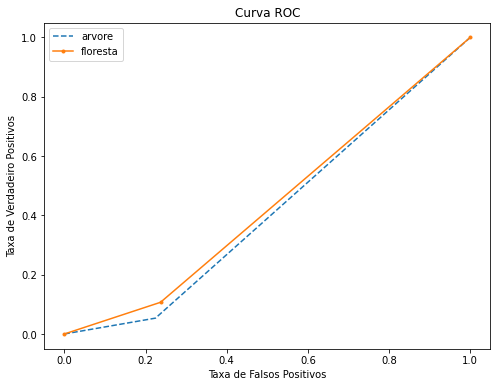

In [70]:
#plotando curvas
plt.plot(fpr_ar,tpr_ar,linestyle='--',label='arvore')
plt.plot(fpr_fl,tpr_fl,marker='.',label='floresta')
plt.title('Curva ROC')
plt.legend()
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiro Positivos')
plt.show()

**Validação Cruzada**

In [71]:
#criando árvore
arvore = DecisionTreeClassifier()

#calculando os scores
scores = cross_val_score(arvore,X,y,cv=10)
round(scores.mean(),3),round(scores.std(),3)

(0.625, 0.288)

In [72]:
#criando árvore
floresta = RandomForestClassifier()

#calculando os scores
scores = cross_val_score(floresta,X,y,cv=10)
round(scores.mean(),3),round(scores.std(),3)

(0.625, 0.288)